Project Title: Credit Card Fraud Detection

Problem Statement:
With the increasing prevalence of online transactions, ensuring the security of credit card
transactions is very important. The objective of this project is to develop a robust machine
learning model capable of accurately detecting fraudulent credit card transactions in real-time.
Utilizing a dataset containing transaction details such as transaction amount, merchant
category, cardholder information, transaction location, the aim is to build a predictive model
that can effectively differentiate between legitimate and fraudulent transactions. By employing
advanced machine learning algorithms and feature engineering techniques, the goal is to create
a system that enhances fraud detection capabilities, thereby minimizing financial losses for both
cardholders and financial institutions while maintaining a low false positive rate. Ultimately, this
project seeks to contribute to the development of proactive measures for securing credit card
transactions and safeguarding the financial interests of stakeholders in the digital economy.

Objective 

The objective of this project is to develop a robust machine learning model capable of accurately detecting fraudulent credit card transactions in real-time.   

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif


In [2]:
#Loading the data set
url= 'https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/credit_card_transactions.csv'
data = pd.read_csv(url)
data

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,N307EM82,RuPay,Education,36508.0,2023-12-29 09:22:23,Delhi,North,33.0,Female,63015.0,34192.55,50000.0,Contactless Payment Device,Friday,Yes
4996,J752EG45,American Express,Online Shopping,42920.0,2023-12-29 19:59:13,Chennai,South,NaN,Female,NaN,19680.39,100000.0,Contactless Payment Device,Friday,No
4997,S458OS59,Visa,Healthcare,33788.0,2023-12-30 07:06:38,Pune,West,56.0,Male,60868.0,33876.96,50000.0,Desktop,Saturday,No
4998,E863PD98,RuPay,Entertainment,38679.0,2023-12-30 07:50:02,Chennai,South,60.0,Male,66948.0,32988.22,50000.0,Desktop,Saturday,No


Exploratory Data Analysis (EDA):

In [3]:
#transformig the column Transaction_DateTime
data['Transaction_DateTime'] = pd.to_datetime(data['Transaction_DateTime'])

In [4]:
#Analysing the disribution of categorical features 
data['Card_Type'].value_counts()

Card_Type
Visa                1979
Mastercard          1540
RuPay                947
American Express     517
Name: count, dtype: int64

In [5]:
data['Merchant_Category'].value_counts()

Merchant_Category
Online Shopping    1019
Retail              959
Utility bill        521
Education           519
Entertainment       517
Healthcare          496
Dining              481
Transportation      466
Name: count, dtype: int64

In [6]:
data['Location'].value_counts()

Location
Surat        431
Kochi        415
Bengaluru    410
Hyderabad    395
Mumbai       387
Chennai      387
Lucknow      379
Pune         376
Kolkata      373
Jaipur       373
Patna        371
Delhi        357
Ahmedabad    346
Name: count, dtype: int64

In [7]:
#b) Exploring numerical features like Transaction_Amount, Cardholder_Age,
#Cardholder_Monthly_Income, and Cardholder_Average_Spend Using descriptive statistics
num = data.select_dtypes('number')
num.describe()

,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit
count,4994.000000,4865.000000,4686.000000,4792.000000,4991.000000
mean,74667.995995,49.106680,137353.817542,63058.343566,124654.377880
std,43089.045623,18.398524,69471.623020,40056.989704,55668.246494
min,25008.000000,18.000000,35005.000000,10282.410000,50000.000000
25%,39742.500000,33.000000,73485.000000,33336.742500,100000.000000
50%,60922.000000,49.000000,131833.000000,49547.945000,100000.000000
75%,98373.500000,65.000000,189054.250000,83732.352500,150000.000000
max,199923.000000,80.000000,299907.000000,199898.290000,200000.000000


In [8]:
#c) Conducting bivariate and multivariate analysis to identify potential relationships between the features as well as with the target variable

Bivariate analysis

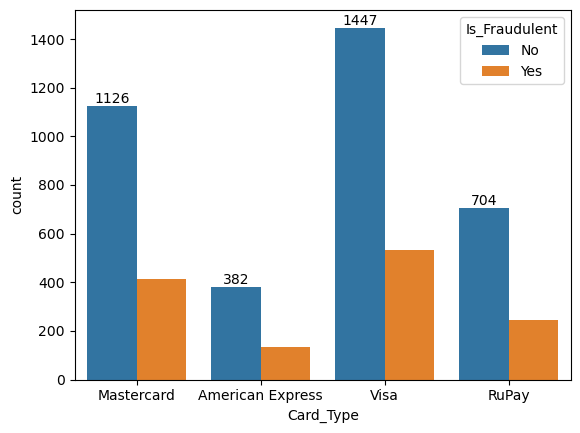

In [9]:
#Bivarite analysis on Card_Type vs Is_Fraudulent
ax=sns.countplot(data= data, x = 'Card_Type', hue= 'Is_Fraudulent')
plt.bar_label(ax.containers[0])
plt.show()

Interpretation

In this plot the x axis denotes the card type, in this visualization visa type card has the highest fradulent count, American express has the lowest fraudulent count

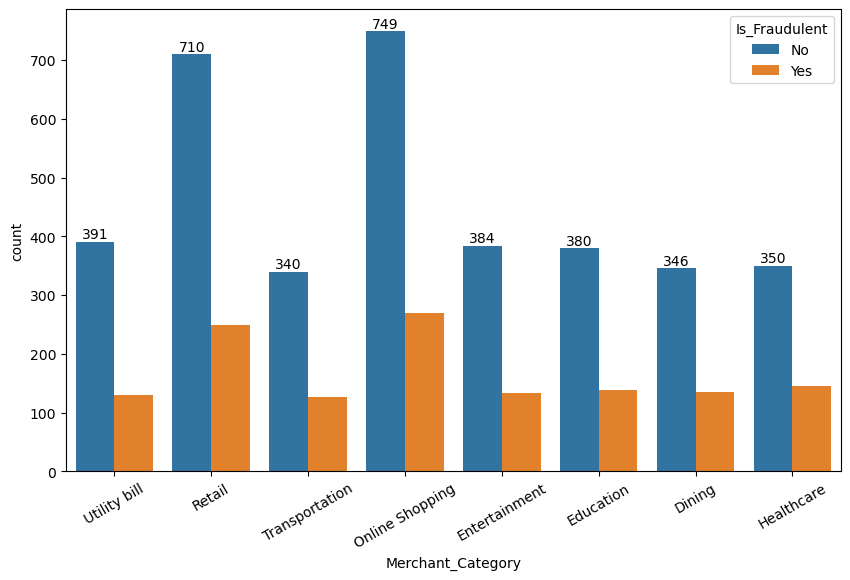

In [10]:
#Bivariate analysis on Merchant_Category vs Is_Fraudulent
plt.figure(figsize=(10,6))
ax=sns.countplot(data= data, x = 'Merchant_Category', hue= 'Is_Fraudulent')
plt.bar_label(ax.containers[0])
plt.xticks(rotation= 30)
plt.show()

Interpretation

In this plot x axis denotes the Merchant_Category, from this visualization we can see that Retail and Online shopping has the highest fradulent count

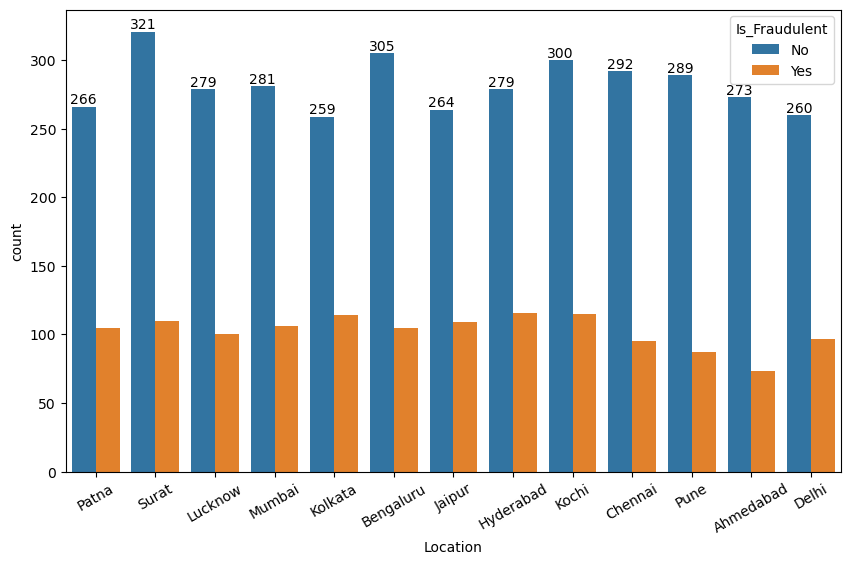

In [11]:
#Bivariate analysis on Location vs fardulent
plt.figure(figsize=(10,6))
ax=sns.countplot(data= data, x = 'Location', hue= 'Is_Fraudulent')
plt.bar_label(ax.containers[0])
plt.xticks(rotation= 30)
plt.show()

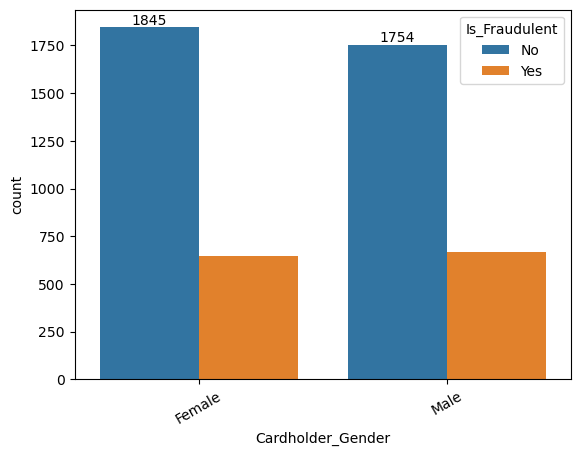

In [12]:
#Bivariate analysis on Cardholder_Gender vs fradulent
ax=sns.countplot(data= data, x = 'Cardholder_Gender', hue= 'Is_Fraudulent')
plt.bar_label(ax.containers[0])
plt.xticks(rotation= 30)
plt.show()

Interpretation:

In this plot x axis denotes the card holder gender , from this visualization we can see that the distribution is almost equal in each gender

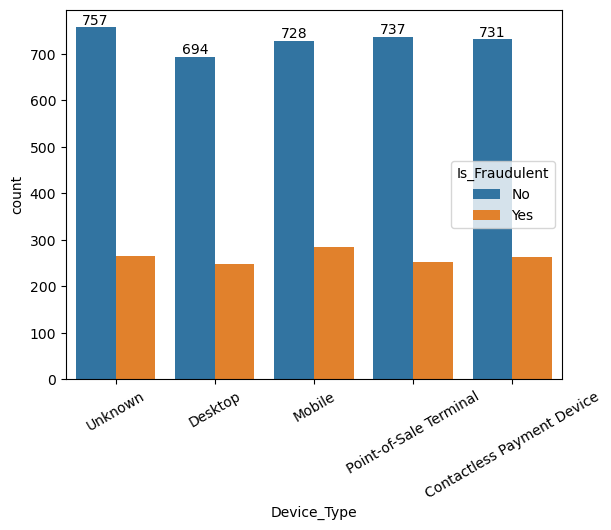

In [13]:
#Device_Type vs Is_fradulent
ax=sns.countplot(data= data, x = 'Device_Type', hue= 'Is_Fraudulent')
plt.bar_label(ax.containers[0])
plt.xticks(rotation= 30)
plt.show()

In this plot x axis denotes the device type, from this visualization we can see that the distribution is almost equal in each type of divice

Multivariate Analysis

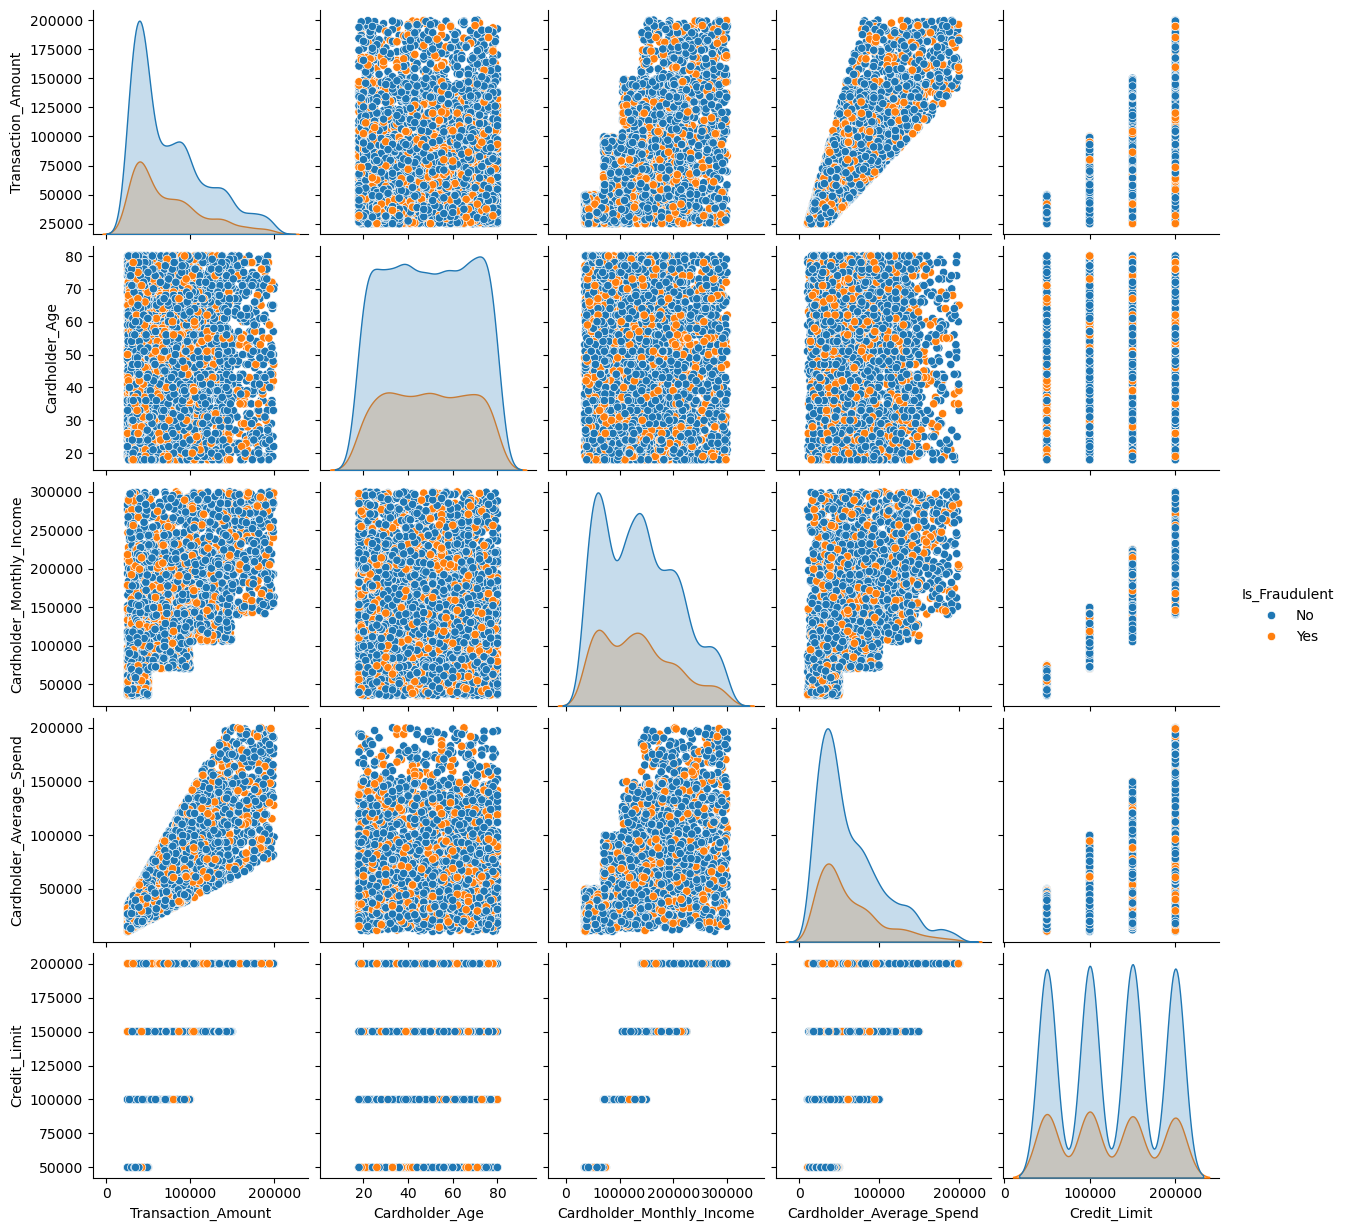

In [14]:
sns.pairplot(data, hue='Is_Fraudulent')

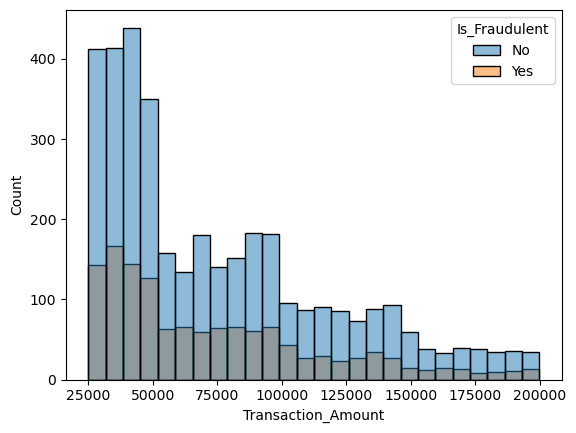

In [15]:
#d) Visualize the distribution of transaction amounts for fraudulent vs. non-fraudulent transactions using histograms or box plots.
sns.histplot(data, x='Transaction_Amount', hue='Is_Fraudulent')
plt.show()

This visualisation shows that most of the fraudulent are detected below 100000 transaction amount.

In [16]:
#e) Investigate whether certain features are more susceptible to fraud.

By investigating the above plots card type, merchant category and transaction amount are more susceptible to fraud.

Data Preprocessing - Data Cleaning:

In [17]:
#a) Handle missing values if any
data.isnull().sum()

Transaction_ID                 0
Card_Type                     17
Merchant_Category             22
Transaction_Amount             6
Transaction_DateTime           0
Location                       0
Region                         0
Cardholder_Age               135
Cardholder_Gender             89
Cardholder_Monthly_Income    314
Cardholder_Average_Spend     208
Credit_Limit                   9
Device_Type                   40
Day_of_Week                    0
Is_Fraudulent                  0
dtype: int64

In [18]:
#Handeling missing values in the column card type
data['Card_Type'].unique()

array(['Mastercard', 'American Express', 'Visa', 'RuPay', nan],
      dtype=object)

In [19]:
data['Card_Type'].mode()

0    Visa
Name: Card_Type, dtype: object

In [20]:
#Imputing missing value using fillna by its mode.
data['Card_Type'] = data['Card_Type'].fillna('Visa')

In [21]:
data.isnull().sum()

Transaction_ID                 0
Card_Type                      0
Merchant_Category             22
Transaction_Amount             6
Transaction_DateTime           0
Location                       0
Region                         0
Cardholder_Age               135
Cardholder_Gender             89
Cardholder_Monthly_Income    314
Cardholder_Average_Spend     208
Credit_Limit                   9
Device_Type                   40
Day_of_Week                    0
Is_Fraudulent                  0
dtype: int64

In [22]:
#Handeling missing values in the column Merchant_Category
data['Merchant_Category'].unique()

array(['Utility bill', 'Retail', 'Transportation', 'Online Shopping',
       'Entertainment', 'Education', 'Dining', 'Healthcare', nan],
      dtype=object)

In [23]:
data['Merchant_Category'].mode()

0    Online Shopping
Name: Merchant_Category, dtype: object

In [24]:
#Imputing missing value using fillna in Merchant_Category by its mode
data['Merchant_Category']=data['Merchant_Category'].fillna('Online Shopping')

In [25]:
data.isnull().sum()

Transaction_ID                 0
Card_Type                      0
Merchant_Category              0
Transaction_Amount             6
Transaction_DateTime           0
Location                       0
Region                         0
Cardholder_Age               135
Cardholder_Gender             89
Cardholder_Monthly_Income    314
Cardholder_Average_Spend     208
Credit_Limit                   9
Device_Type                   40
Day_of_Week                    0
Is_Fraudulent                  0
dtype: int64

In [26]:
#Handling missing values in the column Transaction_Amount
data['Transaction_Amount'].mean()

74667.99599519423

In [27]:
#Imputing missing value using fillna in Transaction_Amount by its mean
data['Transaction_Amount']=data['Transaction_Amount'].fillna(data['Transaction_Amount'].mean())

In [28]:
data.isnull().sum()

Transaction_ID                 0
Card_Type                      0
Merchant_Category              0
Transaction_Amount             0
Transaction_DateTime           0
Location                       0
Region                         0
Cardholder_Age               135
Cardholder_Gender             89
Cardholder_Monthly_Income    314
Cardholder_Average_Spend     208
Credit_Limit                   9
Device_Type                   40
Day_of_Week                    0
Is_Fraudulent                  0
dtype: int64

In [29]:
#Handeling missing values in the column Cardholder_Age
data['Cardholder_Age'].mean()

49.106680369989725

In [30]:
#Imputing missing value using fillna in Cardholder_Age by its mean
data['Cardholder_Age']=data['Cardholder_Age'].fillna(data['Cardholder_Age'].mean())

In [31]:
data.isnull().sum()

Transaction_ID                 0
Card_Type                      0
Merchant_Category              0
Transaction_Amount             0
Transaction_DateTime           0
Location                       0
Region                         0
Cardholder_Age                 0
Cardholder_Gender             89
Cardholder_Monthly_Income    314
Cardholder_Average_Spend     208
Credit_Limit                   9
Device_Type                   40
Day_of_Week                    0
Is_Fraudulent                  0
dtype: int64

In [32]:
#Handeling missing values in the column Cardholder_Gender
data['Cardholder_Gender'].mode()

0    Female
Name: Cardholder_Gender, dtype: object

In [33]:
#Imputing missing value using fillna in Cardholder_Gender by its mode
data['Cardholder_Gender']=data['Cardholder_Gender'].fillna('Female')

In [34]:
data.isnull().sum()

Transaction_ID                 0
Card_Type                      0
Merchant_Category              0
Transaction_Amount             0
Transaction_DateTime           0
Location                       0
Region                         0
Cardholder_Age                 0
Cardholder_Gender              0
Cardholder_Monthly_Income    314
Cardholder_Average_Spend     208
Credit_Limit                   9
Device_Type                   40
Day_of_Week                    0
Is_Fraudulent                  0
dtype: int64

In [35]:
#Handeling missing values in the column Cardholder_Monthly_Income
data['Cardholder_Monthly_Income'].mean()

137353.8175416133

In [36]:
#Imputing missing value using fillna in Cardholder_Monthly_Income by its mean
data['Cardholder_Monthly_Income']=data['Cardholder_Monthly_Income'].fillna(data['Cardholder_Monthly_Income'].mean())

In [37]:
data.isnull().sum()

Transaction_ID                 0
Card_Type                      0
Merchant_Category              0
Transaction_Amount             0
Transaction_DateTime           0
Location                       0
Region                         0
Cardholder_Age                 0
Cardholder_Gender              0
Cardholder_Monthly_Income      0
Cardholder_Average_Spend     208
Credit_Limit                   9
Device_Type                   40
Day_of_Week                    0
Is_Fraudulent                  0
dtype: int64

In [38]:
#Handeling missing values in the column Cardholder_Average_Spend
data['Cardholder_Average_Spend'].mean()

63058.3435663606

In [39]:
#Imputing missing value using fillna in Cardholder_Average_Spend by its mean
data['Cardholder_Average_Spend']=data['Cardholder_Average_Spend'].fillna(data['Cardholder_Average_Spend'].mean())

In [40]:
data.isnull().sum()

Transaction_ID                0
Card_Type                     0
Merchant_Category             0
Transaction_Amount            0
Transaction_DateTime          0
Location                      0
Region                        0
Cardholder_Age                0
Cardholder_Gender             0
Cardholder_Monthly_Income     0
Cardholder_Average_Spend      0
Credit_Limit                  9
Device_Type                  40
Day_of_Week                   0
Is_Fraudulent                 0
dtype: int64

In [41]:
#Handeling missing values in the column Credit_Limit
data['Credit_Limit'].mean()

124654.37788018433

In [42]:
#Imputing missing value using fillna in Credit_Limit by its mean
data['Credit_Limit']=data['Credit_Limit'].fillna(data['Credit_Limit'].mean())

In [43]:
data.isnull().sum()

Transaction_ID                0
Card_Type                     0
Merchant_Category             0
Transaction_Amount            0
Transaction_DateTime          0
Location                      0
Region                        0
Cardholder_Age                0
Cardholder_Gender             0
Cardholder_Monthly_Income     0
Cardholder_Average_Spend      0
Credit_Limit                  0
Device_Type                  40
Day_of_Week                   0
Is_Fraudulent                 0
dtype: int64

In [44]:
#Handeling missing values in the column Device_Type
data['Device_Type'].mode()

0    Unknown
Name: Device_Type, dtype: object

In [45]:
#Imputing missing value using fillna in Device_Type by its mode
data['Device_Type']=data['Device_Type'].fillna('Unknown')

In [46]:
data.isnull().sum()

Transaction_ID               0
Card_Type                    0
Merchant_Category            0
Transaction_Amount           0
Transaction_DateTime         0
Location                     0
Region                       0
Cardholder_Age               0
Cardholder_Gender            0
Cardholder_Monthly_Income    0
Cardholder_Average_Spend     0
Credit_Limit                 0
Device_Type                  0
Day_of_Week                  0
Is_Fraudulent                0
dtype: int64

In [47]:
#b) Check for outliers in numerical features using statistical methods like Z-score or IQR
num = data.select_dtypes('number')
num

,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit
0,27214.0,23.00000,94632.000000,36369.65,100000.0
1,83956.0,49.00000,148118.000000,89179.12,150000.0
2,193280.0,49.10668,210921.000000,106668.60,200000.0
3,167381.0,52.00000,148070.000000,173155.52,200000.0
4,81170.0,37.00000,174470.000000,52713.09,200000.0
...,...,...,...,...,...
4995,36508.0,33.00000,63015.000000,34192.55,50000.0
4996,42920.0,49.10668,137353.817542,19680.39,100000.0
4997,33788.0,56.00000,60868.000000,33876.96,50000.0
4998,38679.0,60.00000,66948.000000,32988.22,50000.0


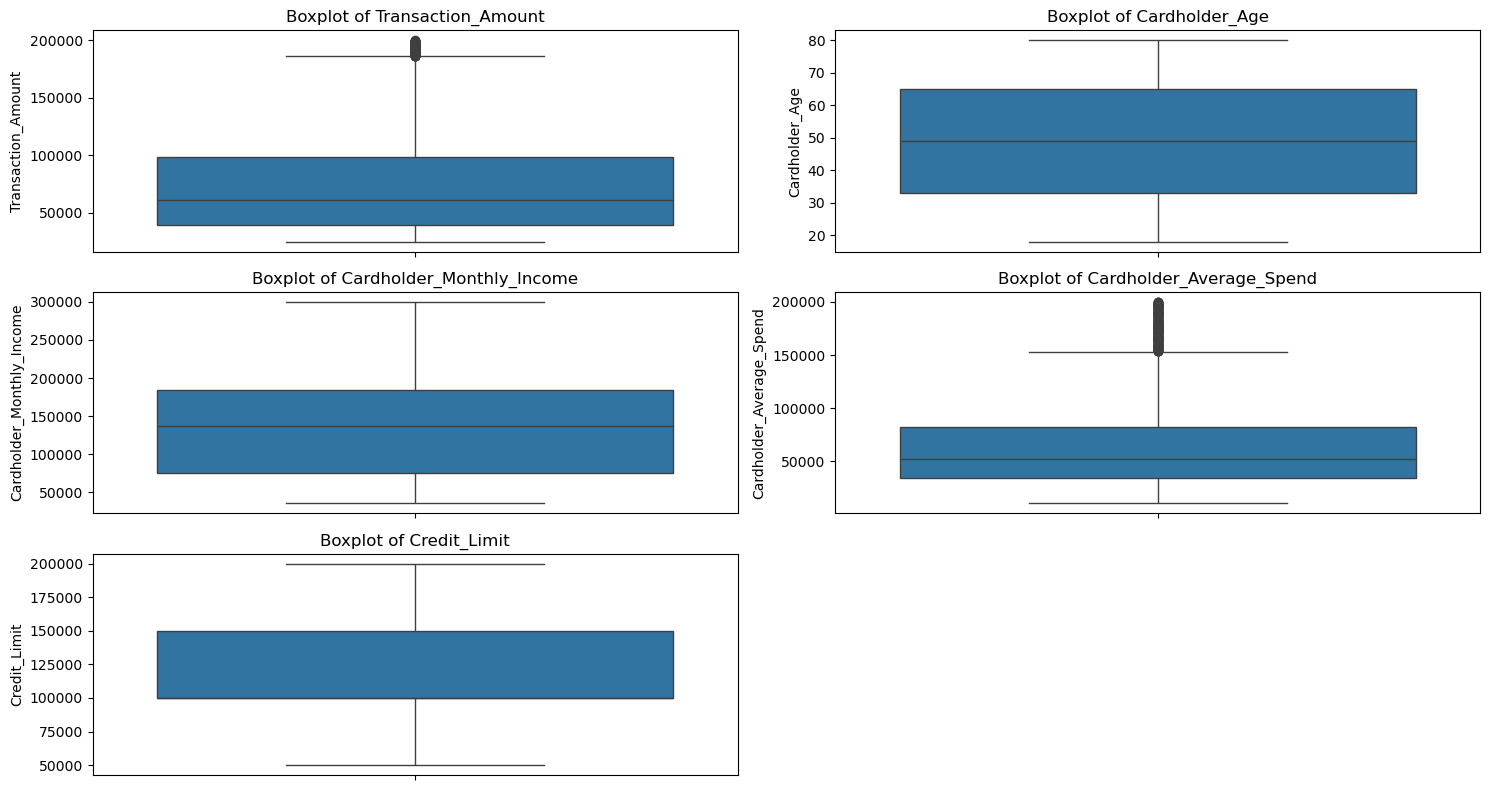

In [48]:
#checking for outliers using boxplot
col=3
plots = 6
row = 2
plt.figure(figsize=(col * 5, row * 4))
for i, cols in enumerate(num):
    plt.subplot(col, row, i+1)
    sns.boxplot(data[cols])
    plt.title(f'Boxplot of {cols}')
    plt.tight_layout()

In [49]:
#Checking for outliers using IQR method
for cols in num:
    Q1= data[cols].quantile(0.25)
    Q3= data[cols].quantile(0.75)
    IQR = Q3-Q1
    Lower_bound= Q1-1.5*IQR
    Upper_bound= Q3+1.5*IQR
    outlier=data[(data[cols]<Lower_bound) | (data[cols]>Upper_bound)]
    print(f'shape of outlier removed {outlier.shape}')

shape of outlier removed (97, 15)
shape of outlier removed (0, 15)
shape of outlier removed (0, 15)
shape of outlier removed (173, 15)
shape of outlier removed (0, 15)


In [50]:
#c) Assess skewness in numerical features by calculating the skewness score.
for cols in num:
    skew_score =data[cols].skew()
    print(f'{cols}={skew_score:2f}')
    

Transaction_Amount=0.969062
Cardholder_Age=-0.009149
Cardholder_Monthly_Income=0.442478
Cardholder_Average_Spend=1.179836
Credit_Limit=0.009981


skewness score is moderate in Transaction_Amount

<Axes: xlabel='Transaction_Amount', ylabel='Density'>

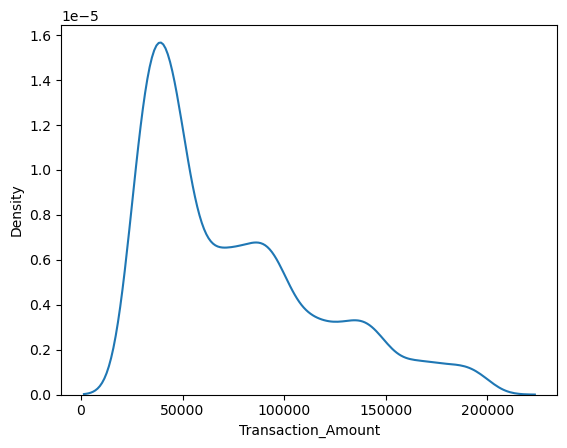

In [51]:
sns.kdeplot(data['Transaction_Amount'])

In [52]:
df=np.log(data['Transaction_Amount'])
df

0       10.211487
1       11.338048
2       12.171895
3       12.028028
4       11.304301
          ...    
4995    10.505287
4996    10.667093
4997    10.427861
4998    10.563052
4999    10.453688
Name: Transaction_Amount, Length: 5000, dtype: float64

<Axes: xlabel='Transaction_Amount', ylabel='Density'>

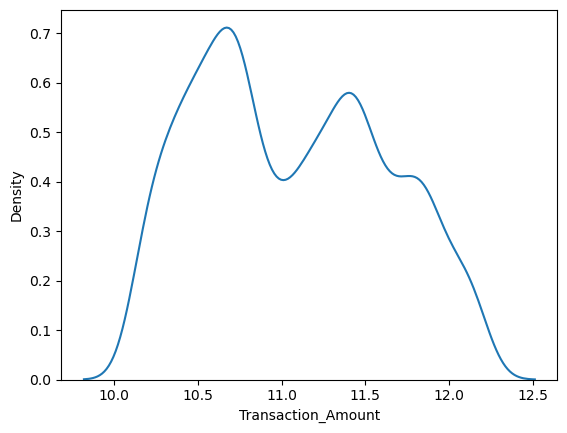

In [53]:
sns.kdeplot(df)

<Axes: xlabel='Cardholder_Average_Spend', ylabel='Density'>

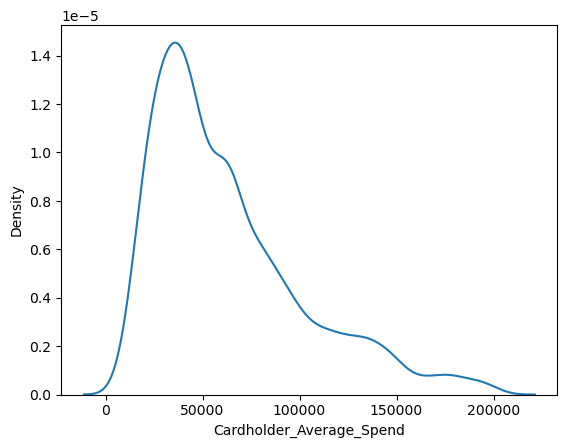

In [54]:
sns.kdeplot(data['Cardholder_Average_Spend'])

In [55]:
df1=np.log(data['Cardholder_Average_Spend'])
df1

0       10.501490
1       11.398402
2       11.577482
3       12.061945
4       10.872619
          ...    
4995    10.439763
4996     9.887378
4997    10.430490
4998    10.403906
4999    10.581832
Name: Cardholder_Average_Spend, Length: 5000, dtype: float64

<Axes: xlabel='Cardholder_Average_Spend', ylabel='Density'>

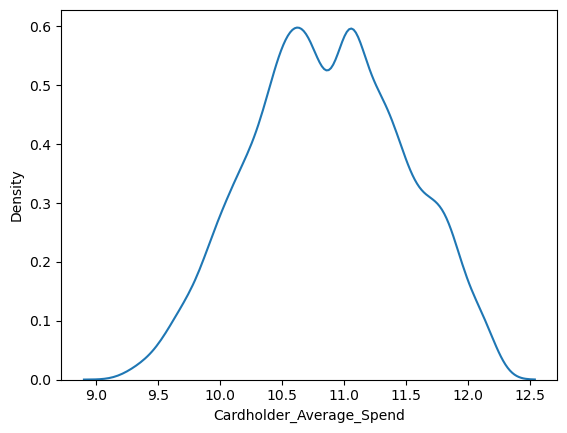

In [56]:
sns.kdeplot(df1)

Feature Engineering:

In [57]:
#a) Identify the categorical features in the dataset.
cat_cols = data.select_dtypes('O').columns
cat_cols

Index(['Transaction_ID', 'Card_Type', 'Merchant_Category', 'Location',
       'Region', 'Cardholder_Gender', 'Device_Type', 'Day_of_Week',
       'Is_Fraudulent'],
      dtype='object')

In [58]:
#b) Encode categorical features to numerical using label encoding
Labelencoder = LabelEncoder()
for cols in cat_cols:
   data[cols]= Labelencoder.fit_transform(data[cols])
data.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,4413,1,7,27214.0,2020-01-01 09:43:17,10,0,23.00000,0,94632.0,36369.65,100000.0,4,6,0
1,4138,0,5,83956.0,2020-01-03 16:26:13,12,3,49.00000,1,148118.0,89179.12,150000.0,1,0,0
2,3323,3,6,193280.0,2020-01-04 03:40:49,10,0,49.10668,1,210921.0,106668.60,200000.0,1,2,0
3,3775,2,4,167381.0,2020-01-04 14:56:24,12,3,52.00000,0,148070.0,173155.52,200000.0,1,2,1
4,1925,2,5,81170.0,2020-01-04 17:26:47,8,1,37.00000,0,174470.0,52713.09,200000.0,2,2,0


Feature Selection:

In [82]:
#a) Select relevant features using SelectKBest
x = data.drop(columns=['Transaction_ID','Transaction_DateTime','Is_Fraudulent'])
y= data['Is_Fraudulent']

In [178]:
selector = SelectKBest(score_func=f_classif,k=5)
x_new = selector.fit_transform(x,y)
selected_features = x.columns[selector.get_support()]
print("Selected features:", selected_features.tolist())

Selected features: ['Merchant_Category', 'Transaction_Amount', 'Region', 'Cardholder_Gender', 'Cardholder_Monthly_Income']


In [179]:
x_new_df = pd.DataFrame(x_new, columns=selected_features)
x_new_df

,Merchant_Category,Transaction_Amount,Region,Cardholder_Gender,Cardholder_Monthly_Income
0,7.0,27214.0,0.0,0.0,94632.000000
1,5.0,83956.0,3.0,1.0,148118.000000
2,6.0,193280.0,0.0,1.0,210921.000000
3,4.0,167381.0,3.0,0.0,148070.000000
4,5.0,81170.0,1.0,0.0,174470.000000
...,...,...,...,...,...
4995,1.0,36508.0,1.0,0.0,63015.000000
4996,4.0,42920.0,2.0,0.0,137353.817542
4997,3.0,33788.0,3.0,1.0,60868.000000
4998,2.0,38679.0,2.0,1.0,66948.000000


Split data into training and testing:

In [236]:
#a) Divide the dataset into training and testing sets
x_train, x_test, y_train, y_test= train_test_split(x_new_df,y, test_size=0.30, random_state=42,stratify=y)

In [237]:
x_train.shape

(3500, 5)

In [238]:
x_test.shape

(1500, 5)

In [248]:
#b) Ensure that both sets maintain the same distribution
y.value_counts(normalize=True)

Is_Fraudulent
0    0.7336
1    0.2664
Name: proportion, dtype: float64

Feature Scaling:

In [240]:
#a) Scale numerical features to ensure that they have the same magnitude, preventing some features from dominating others during model training.
Scaler = StandardScaler()
x_train_scaled = pd.DataFrame(Scaler.fit_transform(x_train), columns=selected_features)
x_test_scaled = pd.DataFrame(Scaler.transform(x_test), columns=selected_features)

In [241]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

Build the Machine Learning Model:

In [242]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

In [243]:
#b) Define a list or dictionary of classifiers to be evaluated; including Logistic Regression, NaiveBayes, Decision Tree, Random Forest, K-Nearest Neighbors, and SVM. Then, compute the accuracy score and F1-score for each classifier.
models = {
    'Logistic Regression' : LogisticRegression(class_weight='balanced'),
    'Naive Bayes': GaussianNB(),
    'Decision Tree' : DecisionTreeClassifier(class_weight='balanced'),
    'Random Forest' : RandomForestClassifier(class_weight='balanced'),
    'K-Nearest Neighbors' :KNeighborsClassifier(),
    'SVM' : SVC()
}

In [244]:
results= []

for name, model in models.items():
    model.fit(x_train_resampled, y_train_resampled)
    y_pred = model.predict(x_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 =  f1_score(y_test, y_pred)
    confusion =  confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    

    results.append({
        "model" : name,
        "accuracy_score": accuracy,
        "f1_score": f1,
        "confusion_matrix" : confusion,
        "precision_score" : precision,
        "recall_score" : recall
    })

data_result= pd.DataFrame(results)
data_result

,model,accuracy_score,f1_score,confusion_matrix,precision_score,recall_score
0,Logistic Regression,0.506000,0.355091,"[[555, 545], [196, 204]]",0.272363,0.5100
1,Naive Bayes,0.438667,0.379971,"[[400, 700], [142, 258]]",0.269311,0.6450
2,Decision Tree,0.561333,0.289417,"[[708, 392], [266, 134]]",0.254753,0.3350
3,Random Forest,0.643333,0.279946,"[[861, 239], [296, 104]]",0.303207,0.2600
4,K-Nearest Neighbors,0.546667,0.321357,"[[659, 441], [239, 161]]",0.267442,0.4025
5,SVM,0.449333,0.369466,"[[432, 668], [158, 242]]",0.265934,0.6050


In [250]:
#c) Select a machine learning algorithm for binary classification with the highest accuracy or F1-score from the above step.

 * Random Forest performed the best and it given the highest accuracy score of 64 % 

In [252]:
#d) Train the selected model using the training dataset and evaluate its performance using appropriate metrics like confusion matrix, accuracy, precision, recall, and F1-score.
model = RandomForestClassifier(class_weight='balanced')
model.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced')

In [253]:
y_pred = model.predict(x_test_scaled)

In [254]:
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)


In [256]:
print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy:}")
print(f"Precision: {precision:}")
print(f"Recall: {recall:}")
print(f"F1 Score: {f1:}")

Confusion Matrix:
 [[844 256]
 [297 103]]
Accuracy: 0.6313333333333333
Precision: 0.28690807799442897
Recall: 0.2575
F1 Score: 0.27140974967061926


In [ ]:
#e) Validate the model's performance on the testing dataset and interpret the results to assess its effectiveness in detecting fraudulent transactions.

Accuracy 63%:
Moderate, but can be misleading due to class imbalance.

Precision 29%:
Of all transactions flagged as fraud, only ~29% are actually fraud.
This means quite a few false alarms — users might get annoyed by unnecessary fraud alerts.

Recall 26%:
Your model detects about 26% of all actual fraudulent transactions.
This is rather low, meaning many frauds go undetected.

F1 Score 27%
Balances precision and recall; still low, reflecting the above.

